In [1]:
## 분산 예시 코드
from sklearn.feature_selection import VarianceThreshold

X =[[0,2,0,3],
    [0,1,2,3],
    [0,1,1,5]]

# 분산의 임계값을 0.2 (Threshold)

selector = VarianceThreshold(threshold=0.2)
X_high_variacne = selector.fit_transform(X)

In [2]:
X_high_variacne

array([[2, 0, 3],
       [1, 2, 3],
       [1, 1, 5]])

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

In [4]:
X = np.array([[1,2,3],
             [4,5,6],
             [7,8,9],
             [10,11,12]])
y = np.array([0,1,0,1]) #타겟값 범주형 (생존률)

In [5]:
selector=SelectKBest(chi2, k=2)

In [6]:
X_new_sel = selector.fit_transform(X,y)

In [7]:
X_new_sel

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

In [8]:
## 타이타닉 데이터로 Feature Selection

import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [9]:
tt = sns.load_dataset('titanic')

In [10]:
# 결측치 처리
tt['age'].fillna(tt['age'].median(), inplace=True)
tt['embark_town'].fillna(tt['embark_town'].mode()[0], inplace=True)
tt['fare'].fillna(tt['fare'].median(), inplace=True)

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_13428\3912462599.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt['age'].fillna(tt['age'].median(), inplace=True)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_13428\3912462599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
tt.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [12]:
# 사용할 피처 정리

X = tt[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = tt['survived']

In [13]:
## 연속형 범주를 범주형으로
## qcut을 통해 분위수로 (4분위)

X.loc[:, 'age_binned']=pd.qcut(X['age'], q=4, labels=False)
X.loc[:, 'fare_binned']=pd.qcut(X['age'], q=4, labels=False)

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_13428\2265949115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'age_binned']=pd.qcut(X['age'], q=4, labels=False)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_13428\2265949115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'fare_binned']=pd.qcut(X['age'], q=4, labels=False)


In [14]:
# 원핫인코더를 잡아 진행

X = X.drop(['age','fare'], axis=1)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first') #sparse_outpu=False는 희소행렬 대신 밀집행렬을 반환, drop='first를 통해 첫 범주 삭제(다중공선성)

In [15]:
X_encoded = onehot_encoder.fit_transform(X)

In [16]:
X_encoded

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [17]:
## 카이제곱 검정 수행

chi_selector = SelectKBest(chi2, k='all')

In [18]:
# feature_selection으로 학습

X_selected_all = chi_selector.fit_transform(X_encoded, y)

In [19]:
chi_scores = pd.DataFrame({
    'Feature': onehot_encoder.get_feature_names_out(X.columns),
    'Score': chi_selector.scores_}).sort_values(by='Score', ascending=True)

In [20]:
chi_scores

,Feature,Score
7,age_binned_3,0.001672
10,fare_binned_3,0.001672
3,embark_town_Queenstown,0.010847
6,age_binned_2,1.615444
9,fare_binned_2,1.615444
5,age_binned_1,3.612659
8,fare_binned_1,3.612659
4,embark_town_Southampton,5.489205
0,pclass_2,6.160767
1,pclass_3,41.553071


In [21]:
# 상위 2개만 고르기!

chi_selector = SelectKBest(chi2, k=2)
X_selected = chi_selector.fit_transform(X_encoded, y)

In [22]:
# 선택된 피쳐들의 점수 산출

selected_indices = chi_selector.get_support(indices=True)
selected_features = onehot_encoder.get_feature_names_out(X.columns)[selected_indices]
selected_scores = chi_selector.scores_[selected_indices]

<BarContainer object of 11 artists>

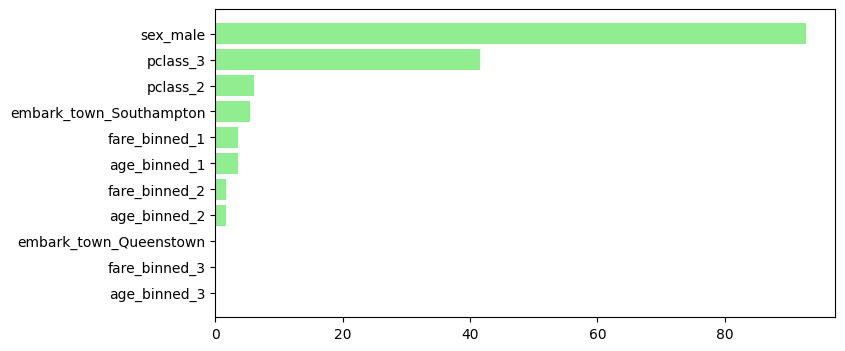

In [23]:
# 간단한 시각화

plt.figure(figsize=(8, 4))
plt.barh(chi_scores['Feature'], chi_scores['Score'], color='lightgreen')

<BarContainer object of 2 artists>

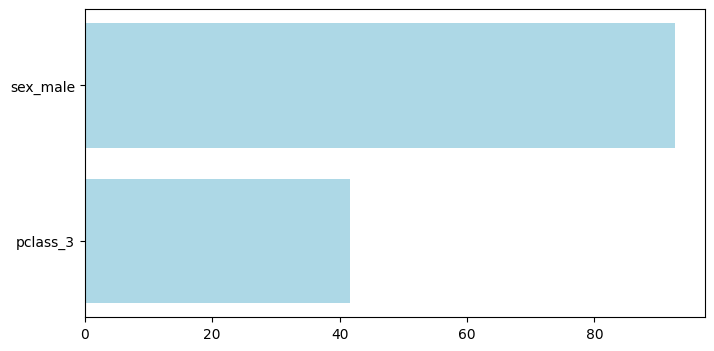

In [24]:
##간단한 시각화

plt.figure(figsize=(8,4))
plt.barh(selected_features, selected_scores, color='lightblue')